# Matplotlib Format Charts Problems

**fig, ax = plt.subplots()**

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Subplots with Bar Charts (2.13.1) - Problem

Create a subplot with 2 rows and 1 column:

- In the first subplot, plot a bar chart of the top 3 job locations by the number of job postings.
- In the second subplot, plot a horizontal bar chart of the top 3 job titles by the number of job postings.
- Use **tight_layout()** to adjust the spacing between subplots.

Hint:
 Use **plt.subplots()** to create the subplots and **fig.tight_layout()** to adjust the spacing.

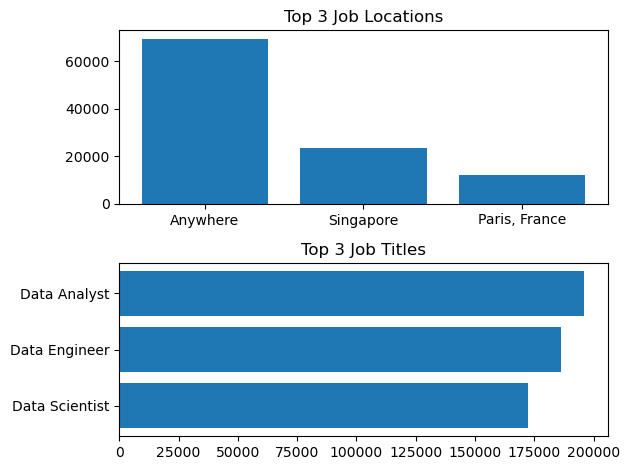

In [8]:
fig, ax = plt.subplots(2,1)
# Top 3 locations
top_3_locations = df['job_location'].value_counts().head(3)
ax[0].bar(top_3_locations.index, top_3_locations.values)
ax[0].set_title('Top 3 Job Locations')

# Top 3 job titles
top_3_jobs = df['job_title_short'].value_counts().head(3)
ax[1].barh(top_3_jobs.index, top_3_jobs.values)
ax[1].set_title('Top 3 Job Titles')
ax[1].invert_yaxis()

fig.tight_layout()
plt.show()

### Subplots with Job Titles by Schedule (2.13.2) - Problem

Create a subplot with 2 rows and 2 columns:

In each subplot, plot a bar chart of the top 3 job titles by the number of job postings for each job schedule type (Full-time, Part-time, Contractor, and Internship).
Use **fig.tight_layout()** to adjust the spacing between subplots.

Code Needed:

`schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']`

Hint: 

Use **plt.subplots()** to create the subplots and **fig.tight_layout()** to adjust the spacing. Filter the DataFrame for each job schedule type before plotting.

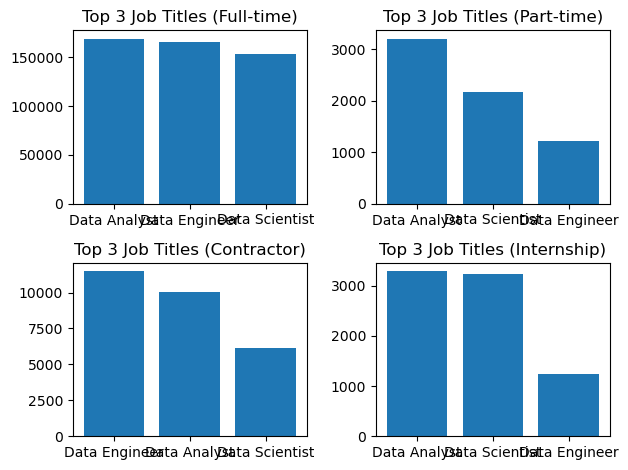

In [29]:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

fig, ax = plt.subplots(2, 2)

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_tiles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_tiles.index, job_tiles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')

fig.tight_layout() #this function puts some space between the two charts
plt.show()




### 

### Top Skills for Job Roles Subplots (2.13.3) - Problem

Create a subplot with 3 rows and 1 column:

In each subplot, plot a horizontal bar chart of the top 3 job skills by the number of job postings for each job title (Senior Data Scientist, Senior Data Engineer, and Senior Data Analyst).
Use fig.tight_layout() to adjust the spacing between subplots and invert_yaxis() to invert the y-axis in each subplot.

Code Needed:

`job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']`

Hint:

Use the plt.subplots() function to create subplots and fig.tight_layout() to prevent overlap.


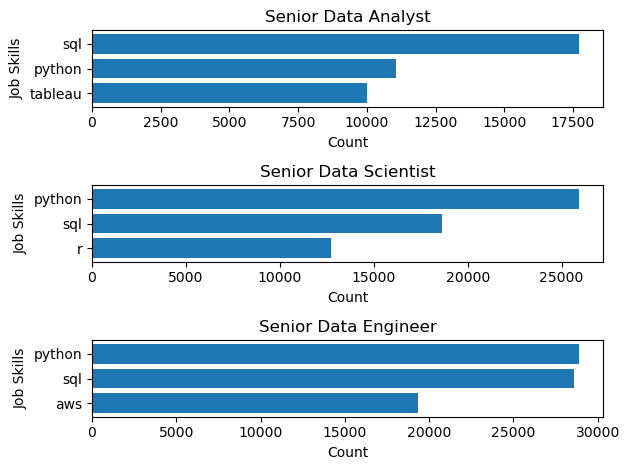

In [3]:
df_exploded = df.explode('job_skills')
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
fig, ax = plt.subplots(len(job_roles), 1)
for i, role in enumerate(job_roles):
    role_skills = df_exploded[df_exploded['job_title_short'] == role]['job_skills'].value_counts().head(3)
    ax[i].barh(role_skills.index, role_skills.values)
    ax[i].set_title(role)
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Job Skills')
    ax[i].invert_yaxis()

fig.tight_layout()
plt.show()